# LOAD Modules

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Download and Plot Single Subject Data

[........................................] 100.00% (  2.5 MB,   3.2 MB/s) /   
[........................................] 100.00% (  2.5 MB,   1.2 MB/s) /   
Extracting EDF parameters from RawDataMNE/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R06.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T2', 'T1']
Extracting EDF parameters from RawDataMNE/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R10.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from RawDataMNE/MNE-eegbci-data/physiobank/database/eegmmidb/S00

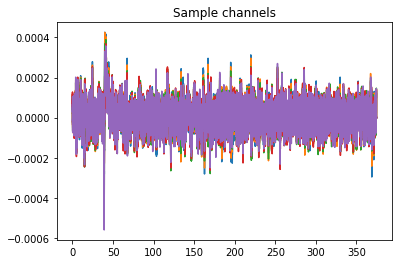

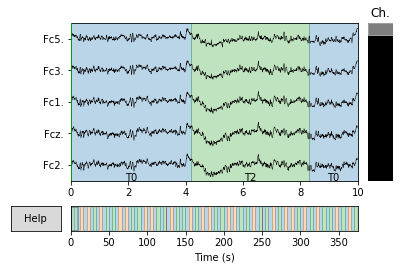

Type: <class 'numpy.ndarray'>  Shape: (65, 60000)


In [10]:
# load and preprocess data ####################################################
subject = 1  # use data from subject 1
runs = [6,10,14]  

fnames = eegbci.load_data(subject, runs, path = 'RawDataMNE')
raws = [read_raw_edf(f, preload=True, stim_channel='auto') for f in fnames]
raw = concatenate_raws(raws)

# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = raw.info['sfreq']
data, times = raw[:5, :]
plt.plot(times, data.T)
plt.title('Sample channels')

raw.plot(n_channels=5, scalings='auto', title='Auto-scaled Data from arrays',
         show=True, block=True)

raw_numpy = raw.get_data()

print("Type:", type(raw_numpy)," Shape:",raw_numpy.shape)


# Download Multiple Subject Data

In [ ]:
Subject = [1,2,3,4,5,6,7,8,9,10]  
Runs = [1,2,3,4,5,6]  
Raw_List = {}

for subj in Subject:
    for run in Runs:
        fnames = eegbci.load_data(subj, run, path = 'RawDataMNE')
        raws = [read_raw_edf(f, preload=True, stim_channel='auto',verbose='WARNING') for f in fnames]
        Raw_List[subj,run]=raws

[........................................] 100.00% (  2.4 MB,   773 kB/s) -   
[........................................] 100.00% (  2.4 MB,   649 kB/s) /   
[........................................] 100.00% (  2.4 MB,   1.6 MB/s) |   
[........................................] 100.00% (  1.2 MB,   450 kB/s) -   
[........................................] 100.00% (  1.2 MB,   922 kB/s) -   
[........................................] 100.00% (  2.4 MB,   2.1 MB/s) |   
[........................................] 100.00% (  2.4 MB,   2.8 MB/s) \   
[........................................] 100.00% (  2.4 MB,   6.7 MB/s) /   
[........................................] 100.00% (  2.4 MB,   2.9 MB/s) |   
[........................................] 100.00% (  1.2 MB,   1.1 MB/s) /   
[........................................] 100.00% (  1.2 MB,   4.1 MB/s) |   
[........................................] 100.00% (  2.5 MB,   2.9 MB/s) -   
[........................................] 100.00% (